# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
-0.001
0.0
-0.001
-0.002
-0.002
-0.002
0.0
0.0
-0.001
-0.001
0.0
0.0
-0.001
-0.001
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.002
0.0
0.0
-0.004
-0.003
0.0
0.0
0.0
0.001
0.978
0.981
0.982
0.981
0.981
1.964
1.966
1.967
1.965
1.965
2.952
2.955
2.956
2.955
2.954
2.954
3.937
3.938
3.939
3.939
4.913
4.917
4.919
4.918
4.918
4.918
5.899
5.899
6.534
6.534
6.532
7.165
7.167
7.169
7.169
7.169
8.147
8.15
8.152
8.15
8.15
9.127
9.13
9.132
9.132
9.132
10.117
10.117
10.115
10.116
11.104
11.105
11.104
11.104
11.103
12.088
12.092
12.093
13.08
13.082
13.085
13.085
13.085
14.072
14.075
14.076
14.076
14.076
14.583
14.585
14.586
14.586
14.585
15.093
15.097
15.095
15.094
15.094
16.09
16.092
16.094
16.091
16.092
17.09
17.09
17.089
17.089
18.086
18.086
18.086
18.086
19.086
19.085
19.084
19.083
20.082
20.082
20.081
20.082
21.08
21.08
21.08
21.08
21.833
21.833
21.833
21.831
21.831
22.583
22.581
22.581
23.563
23.561
23.561
23.561
24.54
24.54
24.539
24.539
25.516
25.516
25.515
25.

57.564
57.564
57.563
57.563
57.563
57.563
57.564
57.564
57.564
57.564
57.562
57.562
57.562
57.562
57.562
57.562
57.561
57.561
57.561
57.561
57.561
57.561
57.559
57.559
57.559
57.56
57.56
57.56
57.56
57.56
57.56
57.558
57.556
57.556
57.56
57.557
57.613
57.643
57.672
57.701
57.731
57.761
57.788
57.818
57.843
57.843
57.843
57.843
57.843
57.843
57.843
57.843
57.843
57.825
57.826
57.856
57.856
57.856
57.856
57.856
57.858
57.858
57.858
57.856
57.856
57.856
57.856
57.855
57.854
57.854
57.854
57.854
57.854
57.854
57.854
57.853
57.852
57.853
57.852
57.852
57.852
57.852
57.85
57.851
57.851
57.851
57.851
57.851
57.851
57.851
57.851
57.851
57.85
57.849
57.849
57.849
57.849
57.849
57.954
58.006
58.032
58.084
58.083
58.085
58.085
58.1
58.099
58.099
58.099
58.099
58.099
58.098
58.098
58.098
58.096
58.098
58.098
58.097
58.096
58.097
58.097
58.097
58.097
58.095
58.095
58.095
58.095
58.095
58.094
58.094
58.094
58.093
58.093
58.093
58.093
58.093
58.093
58.093
58.093
58.093
58.092
58.092
58.092
58.091
58.

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,-0.001
...,...,...
1460,2920,59.615
1461,2922,59.615
1462,2924,59.614
1463,2926,59.614


<IPython.core.display.Javascript object>


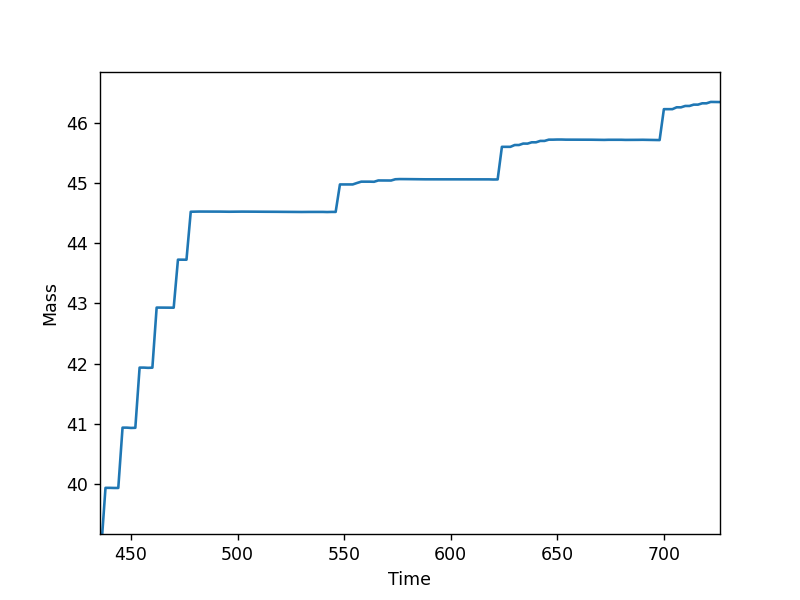

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_040423_S271-276.csv')